In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.generator import Generator

Distribution format: gpt
Output file: gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 20000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      sigma_t = 25 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -0.000682859 mm -> 0 mm
   Scaling sigma_x = 3.99985 mm -> 4 mm
   Shifting avg_y = -0.000113737 mm -> 0 mm
   Scaling sigma_y = 4.00055 mm -> 4 mm
   Shifting avg_px = -0.171177 eV/c -> 0 eV/c
   Scaling sigma_px = 276.831 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.238134 eV/c -> 0 eV/c
   Scaling sigma_

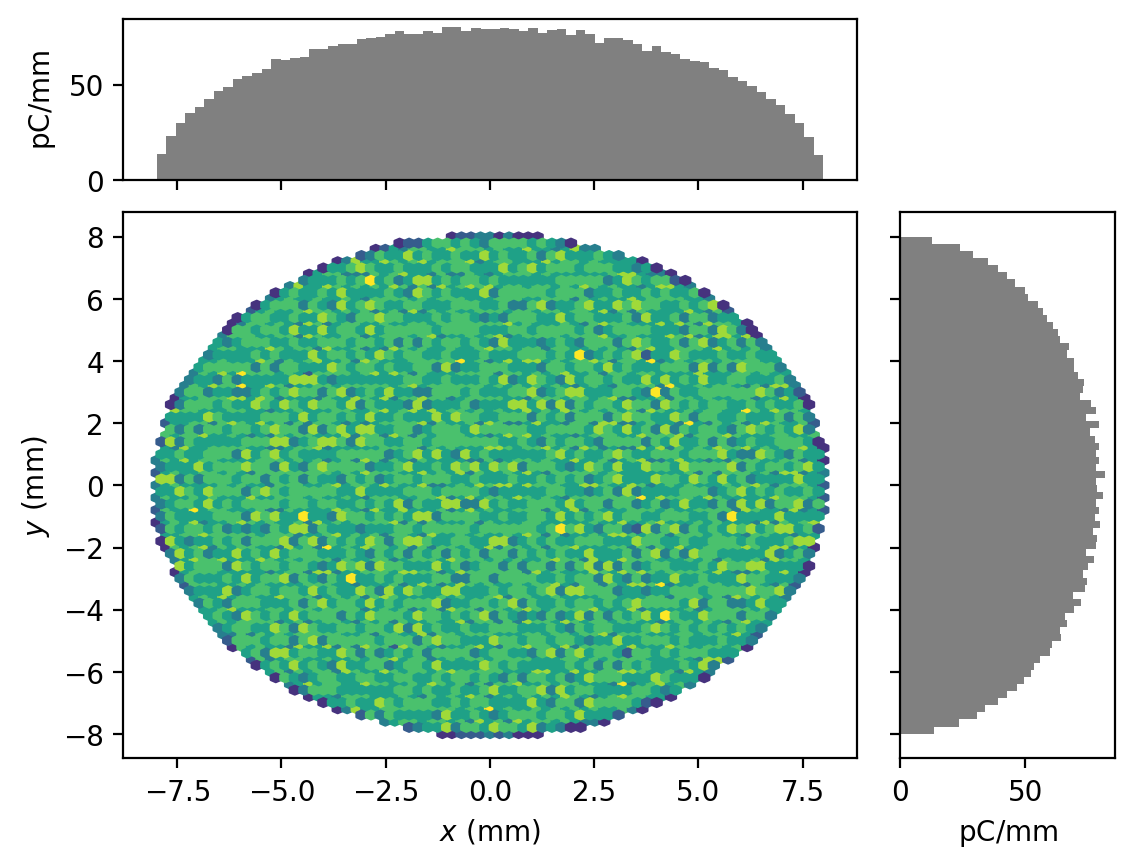

In [3]:
gen = Generator('templates/cu_injector/distgen.in.yaml', verbose=True)
gen.run()
gen.particles.plot('x', 'y')

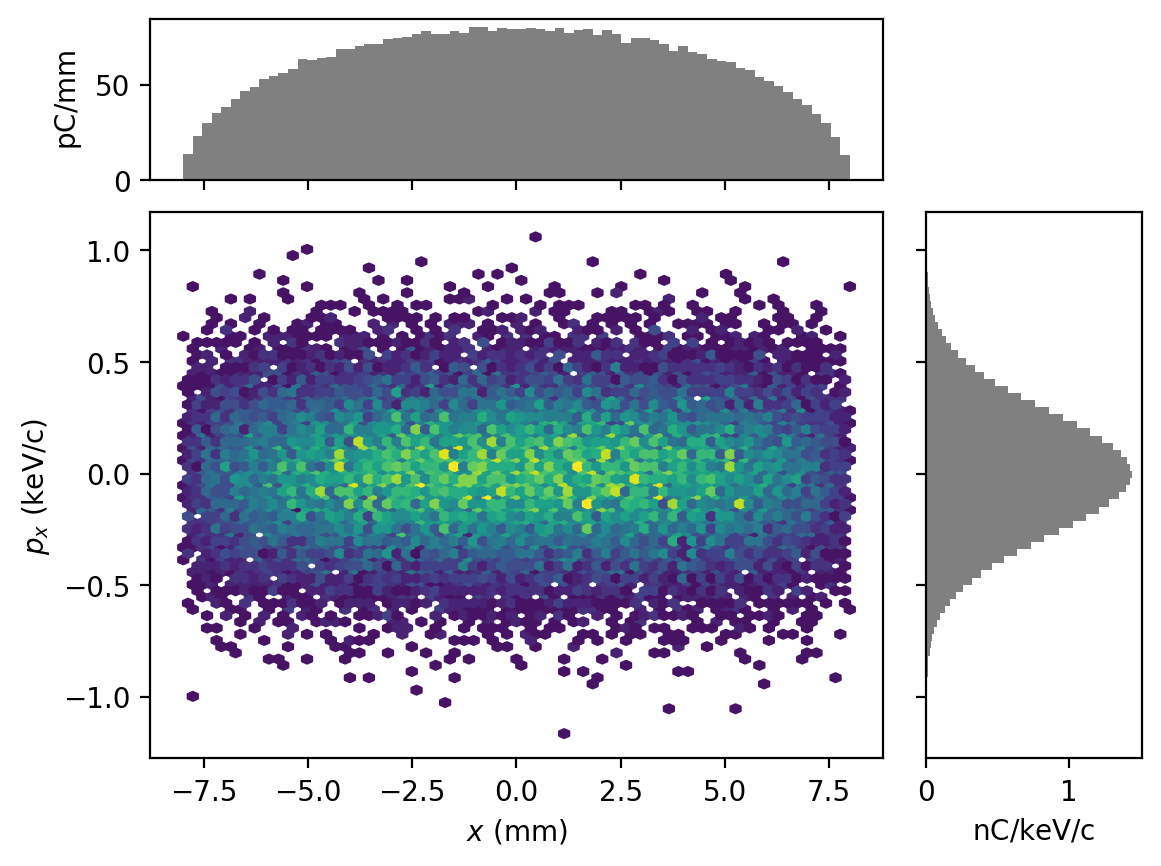

In [4]:
gen.particles.plot('x', 'px')

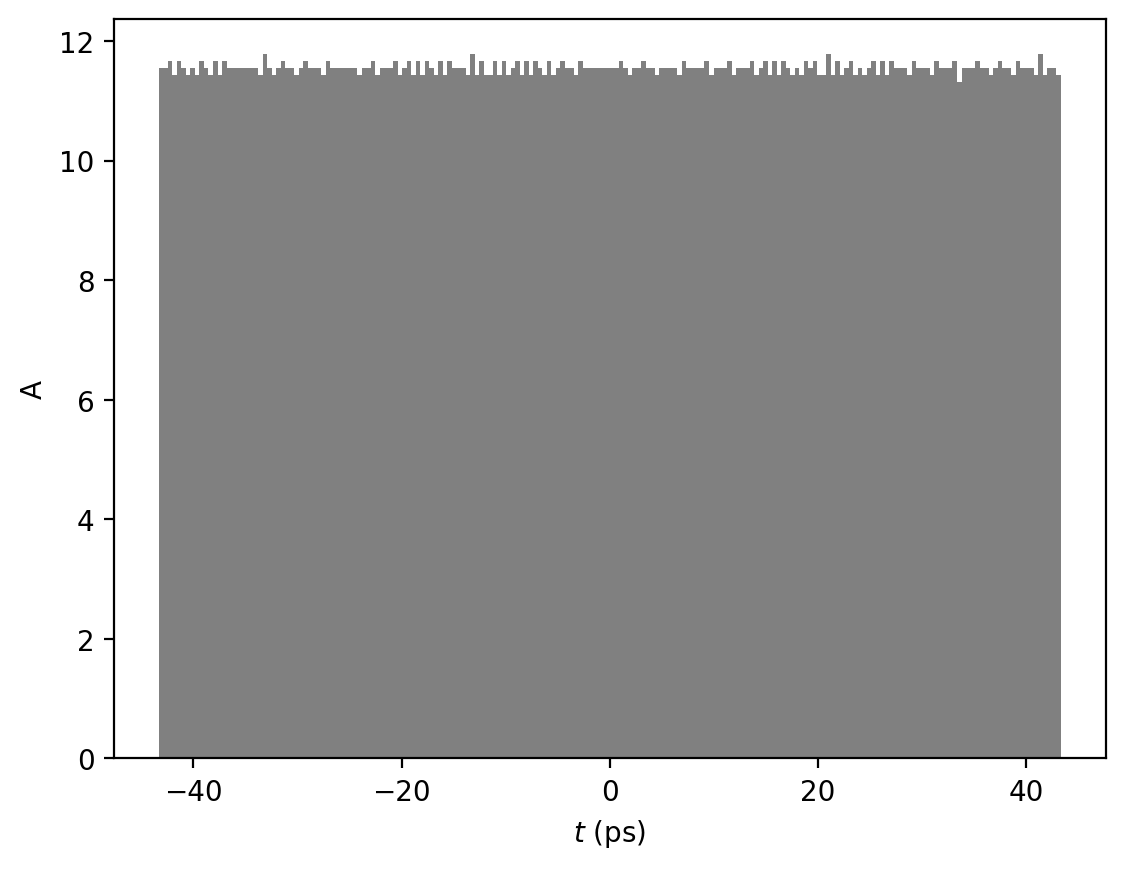

In [5]:
gen.particles.plot('t')

In [6]:
from gpt import run_gpt_with_distgen

In [7]:
settings={'n_particle':200, 
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90, }

G = run_gpt_with_distgen(settings,
                         gpt_input_file='templates/cu_injector_frontend/gpt.in',
                         distgen_input_file='templates/cu_injector_frontend/distgen.in.yaml',
                         verbose=True,
                         auto_phase=True,
                         parse_layout=False
                        )
                         #workdir='templates/cu_injector_frontend/temp',
                         #use_tempdir=False)

Run GPT with Distgen:
n_particle is in distgen
Replacing param n_particle with value 200
Ntout is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
phiCTB01_off is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/w8/8n1md1352pzd3nqp0lhc5jy00000gn/T/tmpj3l_xz44/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 100 pC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 1.41421 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      sigma_t = 10 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution:

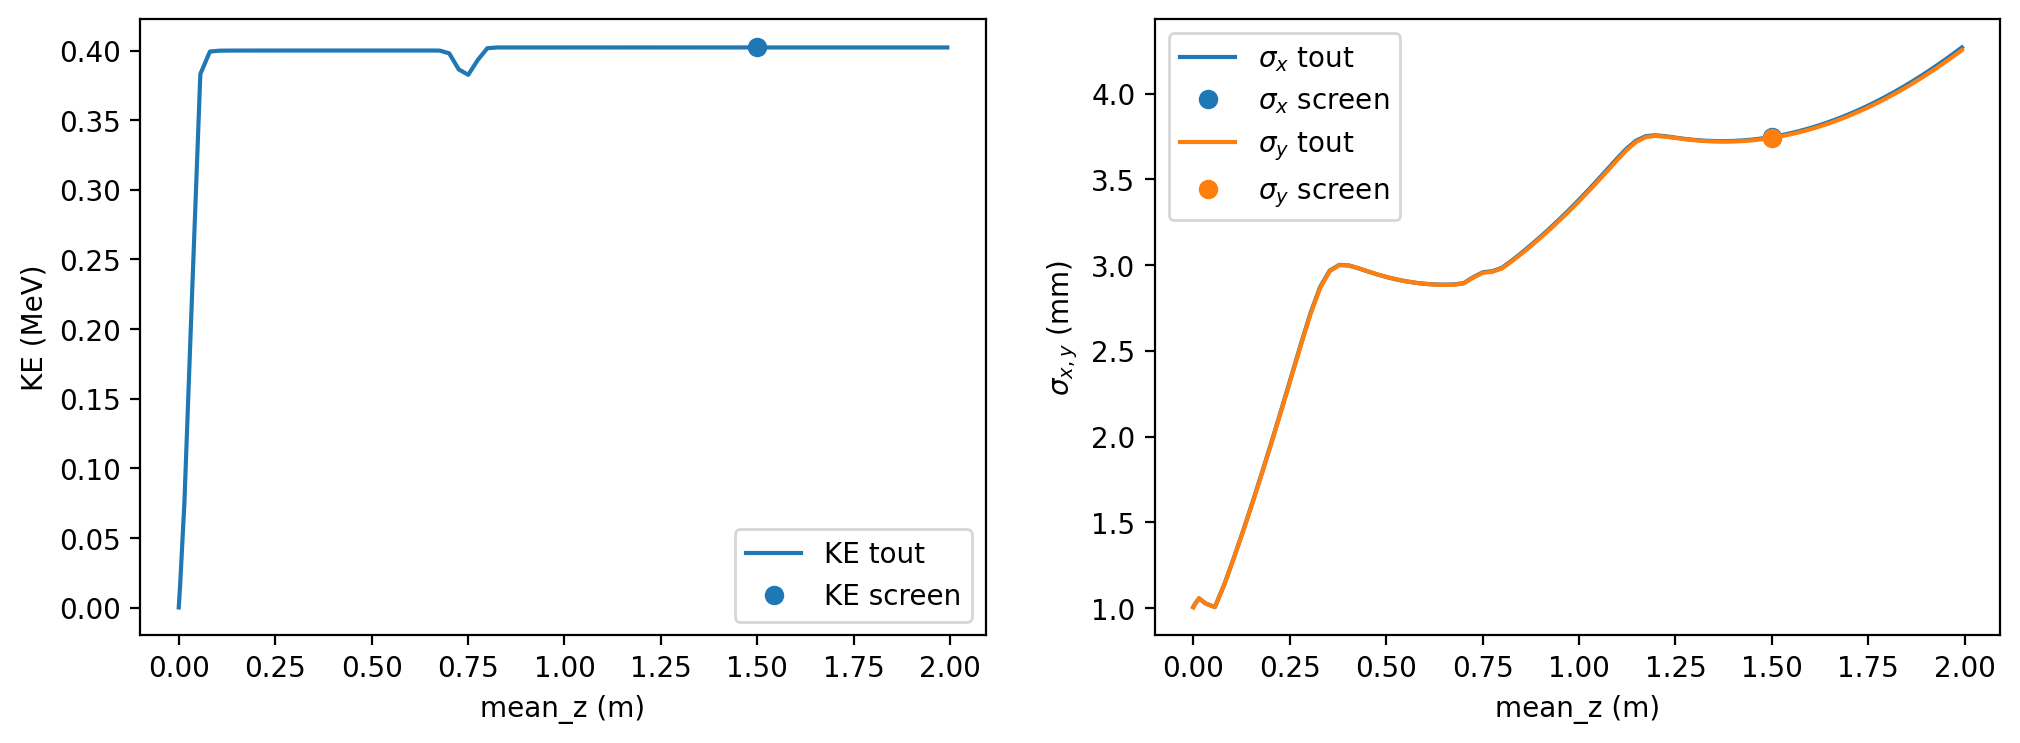

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

tzs = G.stat('mean_z','tout')
tstdx = G.stat('sigma_x','tout')
tstdy = G.stat('sigma_y','tout')
tKE = G.stat('mean_kinetic_energy','tout')

pzs = G.stat('mean_z','screen')
pstdx = G.stat('sigma_x','screen')
pstdy = G.stat('sigma_y','screen')
pKE = G.stat('mean_kinetic_energy','screen')

ax[0].plot(tzs, tKE/1e6, pzs, pKE/1e6, 'o', color='#1f77b4')
ax[0].set_xlabel('mean_z (m)');
ax[0].set_ylabel('KE (MeV)');
ax[0].legend(['KE tout','KE screen'])

ax[1].plot(tzs, tstdx*1e3, pzs, pstdx*1e3, 'o', color='#1f77b4')
ax[1].plot(tzs, tstdy*1e3, pzs, pstdy*1e3, 'o', color='#ff7f0e')         
ax[1].set_xlabel('mean_z (m)');
ax[1].set_ylabel(r'$\sigma_{x,y}$ (mm)');
ax[1].legend([r'$\sigma_x$ tout', r'$\sigma_x$ screen', r'$\sigma_y$ tout', r'$\sigma_y$ screen']);